In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [6]:
# Load the dataset from the uploaded file
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [9]:
# Assuming the file name is 'Iris.csv'
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)



In [10]:
# Display the first few rows of the dataset
data.head()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# Determine the optimum number of clusters using the Elbow method
X = data.iloc[:, [0, 1, 2, 3]].values
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

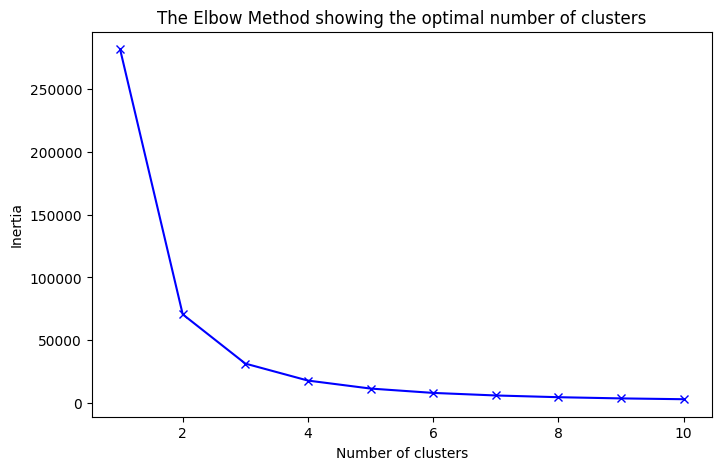

In [12]:
# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal number of clusters')
plt.show()

In [13]:
# Apply K-means clustering with the optimal number of clusters
# From the Elbow method, let's assume the optimal number of clusters is 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

In [14]:
# Add the cluster labels to the dataset
data['Cluster'] = y_kmeans


In [15]:
# Visualize the clusters
plt.figure(figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

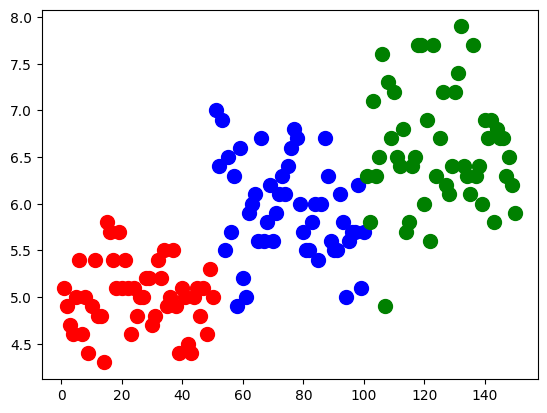

In [16]:
# Scatter plot for the first two features
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')


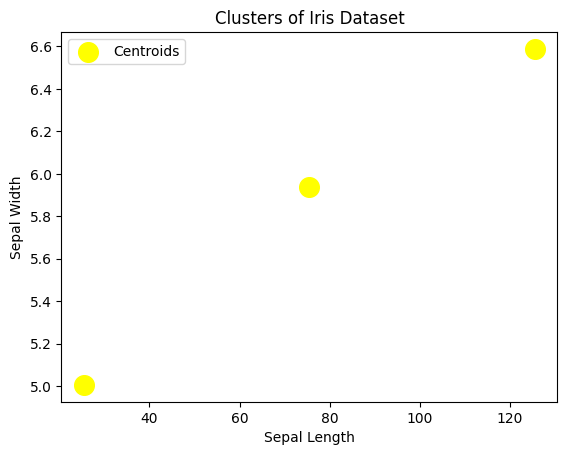

In [17]:
# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids')

plt.title('Clusters of Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()